In [1]:
import sys, os
from pathlib import Path
if "../src" not in sys.path:
    sys.path.append("../src")

In [2]:
# from scipy import sparse
# from tqdm.auto import tqdm

# fps = sorted([f for f in Path('../data/chunked_freq').glob('*清*.npz')])
# mats = [sparse.load_npz(fp) for fp in tqdm(fps)]
# mat = sparse.hstack(mats)
# sparse.save_npz('chunked_freq_清.npz', mat)

In [3]:
# import json
# import re

# with open('../data/chunked_freq/text_slice_lookup.json', 'r', encoding='utf-8') as f:
#     text_slice_lookup = json.load(f)

# lst = [text_slice_lookup[k] for k in sorted(list(text_slice_lookup.keys())) if '清' in k]
# lst = [n for m in lst for n in m]

# # mat.shape[1] == len(lst)
# text_slice_lookup['chunked_freq_清'] = lst
# print(text_slice_lookup.keys())

# with open('text_slice_lookup.json', 'w', encoding='utf-8') as f:
#     json.dump(text_slice_lookup, f)

In [4]:
import json
from scipy import sparse
from tqdm.auto import tqdm
from dietcoke import dynaspan_lst, corpus_lst, Author
import numpy as np
import pandas as pd

In [5]:
FOLDER = Path('../data/chunked_freq')

with open(FOLDER / 'text_slice_lookup.json', 'r', encoding='utf-8') as f:
    text_slice_lookup = json.load(f)

profile_df = pd.read_csv('../data/author_time/author_profile.csv').dropna(subset=['mid_year'])
dic = dict(zip(profile_df['urn'], profile_df['mid_year']))

In [6]:
mat = None
for dynaspan in tqdm(dynaspan_lst):
    dyna_mat = sparse.load_npz(f'../data/chunked_freq/chunked_freq_{dynaspan}.npz')
    cols = [i for i, n in enumerate(text_slice_lookup[f'chunked_freq_{dynaspan}']) if n.split('_')[0] in dic.keys()]
    
    dyna_mat = dyna_mat.todense()[:,cols]
    dyna_mat = sparse.csr_matrix(dyna_mat)
    print(dyna_mat.shape)

    if mat is None:
        mat = dyna_mat
    else:
        mat = sparse.hstack([mat, dyna_mat])

 12%|█▎        | 1/8 [00:00<00:00,  9.16it/s]

(54227, 12)


 25%|██▌       | 2/8 [00:02<00:07,  1.25s/it]

(54227, 675)


 38%|███▊      | 3/8 [00:04<00:09,  1.85s/it]

(54227, 1181)


 50%|█████     | 4/8 [00:11<00:14,  3.66s/it]

(54227, 2226)
(54227, 8443)


 62%|██████▎   | 5/8 [00:47<00:46, 15.62s/it]

(54227, 7489)


 75%|███████▌  | 6/8 [01:16<00:39, 19.85s/it]

(54227, 25778)


 88%|████████▊ | 7/8 [04:47<01:22, 82.62s/it]

(54227, 256)


100%|██████████| 8/8 [04:50<00:00, 36.32s/it]


In [7]:
mat.shape

(54227, 46060)

In [10]:
from scipy.sparse.linalg import svds, eigs
from scipy import sparse

mat = dyna_mat.astype(np.float64)
u, s, vt = svds(mat, k=2)

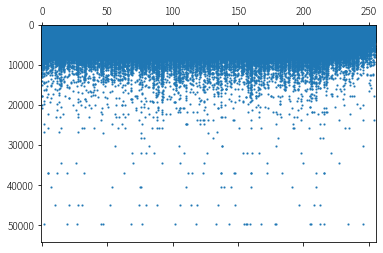

In [11]:
import matplotlib.pyplot as plt

plt.spy(mat, aspect='auto', markersize=1)

In [12]:
import pickle

for fn, n in zip(['u', 's', 'vt'], [u, s, vt]):
    with open(f'sparse_svd_{fn}.pickle', 'wb') as f:
        pickle.dump(n, f)